In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
MLP_df = pd.read_csv('results/MLP.csv')
CNN_df = pd.read_csv('results/CNN.csv')
GCMERGE_df = pd.read_csv('results/GCMERGE.csv')

In [3]:
MLP_df = MLP_df.add_prefix('MLP_').rename(columns={'MLP_cell_line': 'cell_line'})
CNN_df = CNN_df.add_prefix('CNN_').rename(columns={'CNN_cell_line': 'cell_line'})
GCMERGE_df = GCMERGE_df.add_prefix('GC-MERGE_').rename(columns={'GC-MERGE_cell_line': 'cell_line'})

In [4]:
MLP_df

,cell_line,MLP_auroc_mu,MLP_auroc_std,MLP_pcc_mu,MLP_pcc_std
0,E116,0.906605,0.009987,0.764181,0.016639
1,E122,0.892412,0.010573,0.723698,0.029949
2,E123,0.918281,0.006657,0.782800,0.018913


In [5]:
CNN_df

,cell_line,CNN_auroc_mu,CNN_auroc_std,CNN_pcc_mu,CNN_pcc_std
0,E116,0.906885,0.002406,0.774956,0.007025
1,E122,0.890568,0.002996,0.723383,0.015368
2,E123,0.926766,0.002855,0.801633,0.011083


In [6]:
GCMERGE_df

,cell_line,GC-MERGE_auroc_mu,GC-MERGE_auroc_std,GC-MERGE_pcc_mu,GC-MERGE_pcc_std
0,E116,0.912873,0.003854,0.778975,0.011006
1,E122,0.904813,0.007665,0.742654,0.020384
2,E123,0.927106,0.007539,0.790787,0.018534


In [7]:
merged_df = GCMERGE_df.merge(MLP_df, on='cell_line').merge(CNN_df, on='cell_line')
merged_df

,cell_line,GC-MERGE_auroc_mu,GC-MERGE_auroc_std,GC-MERGE_pcc_mu,GC-MERGE_pcc_std,MLP_auroc_mu,MLP_auroc_std,MLP_pcc_mu,MLP_pcc_std,CNN_auroc_mu,CNN_auroc_std,CNN_pcc_mu,CNN_pcc_std
0,E116,0.912873,0.003854,0.778975,0.011006,0.906605,0.009987,0.764181,0.016639,0.906885,0.002406,0.774956,0.007025
1,E122,0.904813,0.007665,0.742654,0.020384,0.892412,0.010573,0.723698,0.029949,0.890568,0.002996,0.723383,0.015368
2,E123,0.927106,0.007539,0.790787,0.018534,0.918281,0.006657,0.782800,0.018913,0.926766,0.002855,0.801633,0.011083


In [8]:
cell_lines = ["E116", "E123", "E122"]
models = ['MLP', 'CNN', 'GC-MERGE']
means_auroc = merged_df[[f"{model}_auroc_mu" for model in models]].values.T
stds_auroc = merged_df[[f"{model}_auroc_std" for model in models]].values.T
means_auroc, stds_auroc

(array([[0.90660486, 0.89241172, 0.91828059],
        [0.90688513, 0.89056796, 0.92676647],
        [0.91287264, 0.90481334, 0.92710624]]),
 array([[0.00998704, 0.0105726 , 0.0066567 ],
        [0.00240645, 0.00299639, 0.00285544],
        [0.00385397, 0.00766508, 0.00753883]]))

In [9]:
means_pcc = merged_df[[f"{model}_pcc_mu" for model in models]].values.T
stds_pcc = merged_df[[f"{model}_pcc_std" for model in models]].values.T
means_pcc, stds_pcc

(array([[0.7641811 , 0.72369794, 0.78279967],
        [0.77495605, 0.72338335, 0.80163348],
        [0.77897481, 0.74265411, 0.79078689]]),
 array([[0.01663876, 0.02994946, 0.01891292],
        [0.00702537, 0.0153684 , 0.0110833 ],
        [0.01100627, 0.02038392, 0.01853431]]))

In [10]:
x_pos = np.arange(len(cell_lines))
bar_width = 0.25 
colors = ["#41106e", "#f00e1d", "#f08800"]

# AUROC Bar Graph

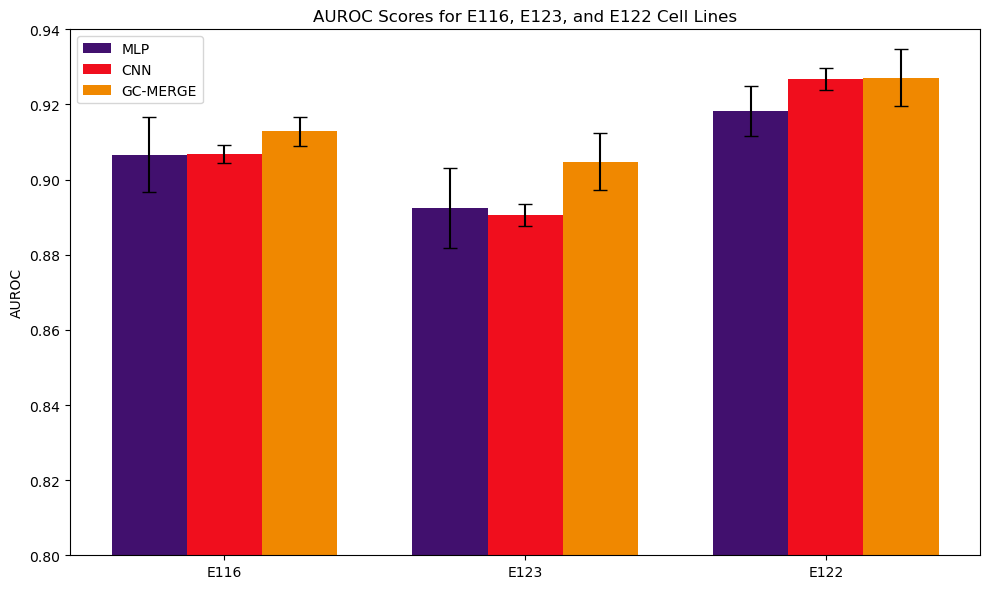

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure(figsize=(10, 6))
for i, (model, color) in enumerate(zip(models,colors)):
    plt.bar(
        x_pos + i * bar_width,
        means_auroc[i],
        yerr=stds_auroc[i],
        capsize=5,
        label=model,
        width=bar_width, 
        color=color
    )

# Add labels and title
plt.xticks(x_pos + bar_width, cell_lines)  
plt.ylabel("AUROC")
plt.title("AUROC Scores for E116, E123, and E122 Cell Lines")
plt.legend()

plt.ylim(0.8, 0.94)
plt.tight_layout()
plt.show()
plt.savefig('results/AUROC.png')

# PCC Bar Graph

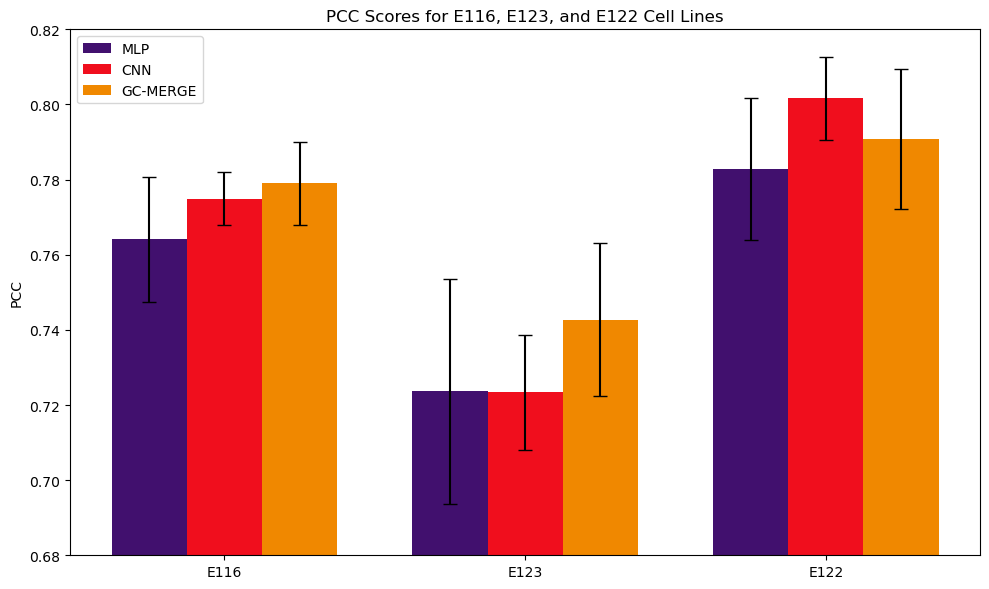

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(10, 6))
for i, (model, color) in enumerate(zip(models,colors)):
    plt.bar(
        x_pos + i * bar_width, 
        means_pcc[i], 
        yerr=stds_pcc[i], 
        capsize=5,  
        label=model,
        width=bar_width,
        color=color
    )

# Add labels and title
plt.xticks(x_pos + bar_width, cell_lines)
plt.ylabel("PCC")
plt.title("PCC Scores for E116, E123, and E122 Cell Lines")
plt.legend()

# Display the plot
plt.ylim(0.68, 0.82)
plt.tight_layout()
plt.show()
plt.savefig('results/PCC.png')